<a href="https://colab.research.google.com/github/CarolineJoi3375/RTA/blob/main/Appendix_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Standard Random Forest classifier without SMOTE (default parameter of n_estimators = 100)

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Random Forest Model using Scikit Learn
#Instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# Train Random Forest Classifer
rfc_100 = rfc_100.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rfc_100.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Standard Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Standard Random Forest Accuracy: 0.8668442077230359
              precision    recall  f1-score   support

           1       0.36      0.07      0.12        58
           2       0.41      0.05      0.08      1025
           3       0.87      0.99      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.55      0.37      0.38      8261
weighted avg       0.81      0.87      0.82      8261

Precision: 0.8123404836600336
Recall: 0.8668442077230359
f1 Score: 0.8179708812509066


In [ ]:
#Random Forest classifier with Class Weighting (default parameter of n_estimators = 100)

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Random Forest Model using Scikit Learn
#Instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced")

# Train Random Forest Classifer
rfc_100 = rfc_100.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rfc_100.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest with Class Weighting Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Random Forest with Class Weighting Accuracy: 0.8686599685268127
              precision    recall  f1-score   support

           1       0.33      0.07      0.11        58
           2       0.47      0.04      0.07      1025
           3       0.87      0.99      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.56      0.37      0.37      8261
weighted avg       0.82      0.87      0.82      8261

Precision: 0.8192792818201662
Recall: 0.8686599685268127
f1 Score: 0.8169920003802676


In [ ]:
#Random Forest classifier with Bootstrap Class Weighting (default parameter of n_estimators = 100)

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Random Forest Model using Scikit Learn
#Instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample")

# Train Random Forest Classifer
rfc_100 = rfc_100.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rfc_100.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest with Bootstrap Class Weighting Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Random Forest with Bootstrap Class Weighting Accuracy: 0.8674494613242949
              precision    recall  f1-score   support

           1       0.36      0.07      0.12        58
           2       0.40      0.03      0.06      1025
           3       0.87      0.99      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.55      0.36      0.37      8261
weighted avg       0.81      0.87      0.82      8261

Precision: 0.8108609845919171
Recall: 0.8674494613242949
f1 Score: 0.8155102573483899


In [ ]:
#Random Forest classifier Hyperparameter Tuning - RandomizedSearchCV check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

param_grid = {
    'n_estimators': randint(50,500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(1,20),
    'max_leaf_nodes': randint(1,20)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=17, max_leaf_nodes=3, n_estimators=289)


In [ ]:
#Random Forest classifier Hyperparameter Tuning - RandomizedSearchCV

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Random Forest Model using Scikit Learn
# instantiate the classifier with best params
rfc_rs = RandomForestClassifier(max_depth=17,
                                    max_features=None,
                                    max_leaf_nodes=3,
                                    n_estimators=289)

# Train Random Forest Classifer
rfc_rs = rfc_rs.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rfc_rs.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest RandomizedSearchCV Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Random Forest RandomizedSearchCV Accuracy: 0.8689020699673163
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00      1025
           3       0.87      1.00      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.29      0.33      0.31      8261
weighted avg       0.75      0.87      0.81      8261

Precision: 0.754990807193487
Recall: 0.8689020699673163
f1 Score: 0.8079511701827057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

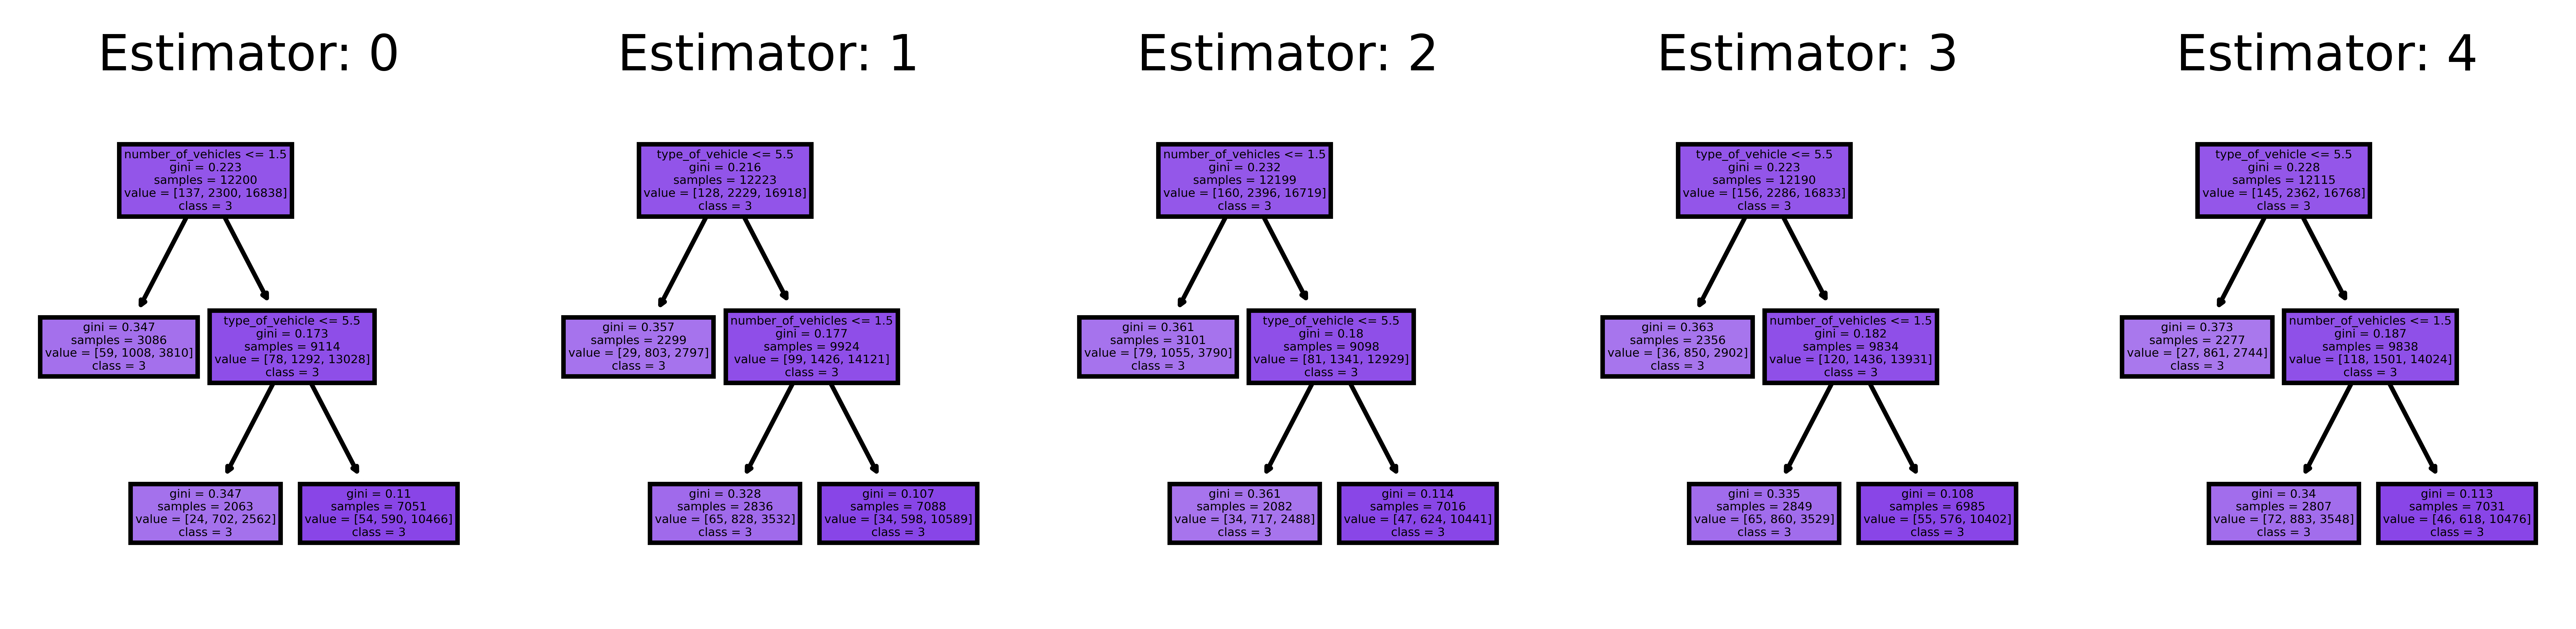

In [ ]:
#Random Forest classifier Hyperparameter Tuning - RandomizedSearchCV with visualisation

# This may not the best way to view each estimator as it is small
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
class_names=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=1000)

for index in range(0, 5):
    tree.plot_tree(rfc_rs.estimators_[index],
                   feature_names = feature_cols,
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

fig.savefig('RF_RandomizedSearchCV_5trees.png')

In [ ]:
#Random Forest classifier Hyperparameter Tuning - GridSearchCV check best parameters 3rd run

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

param_grid = {
    'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 200, 210, 220, 230, 240],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 150, 'random_state': 42}


In [ ]:
#Random Forest classifier Hyperparameter Tuning - GridSearchCV

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Random Forest Model using Scikit Learn
# instantiate the classifier with best params
rfc_grid = RandomForestClassifier(max_depth=9,
                                    max_features='sqrt',
                                    criterion='entropy',
                                    n_estimators=150,
                                    random_state=42)

# Train Random Forest Classifer
rfc_grid = rfc_grid.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rfc_grid.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest GridSearchCV Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Random Forest GridSearchCV Accuracy: 0.869023120687568
              precision    recall  f1-score   support

           1       1.00      0.02      0.03        58
           2       0.00      0.00      0.00      1025
           3       0.87      1.00      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.62      0.34      0.32      8261
weighted avg       0.76      0.87      0.81      8261

Precision: 0.7621031522135134
Recall: 0.869023120687568
f1 Score: 0.808241503431802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
#Standard Random Forest classifier with SMOTE (default parameter of n_estimators = 100)

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

#Build Random Forest Model using Scikit Learn
#Instantiate the classifier with n_estimators = 100
rfcsmote_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# Train Random Forest Classifer
rfcsmote_100 = rfcsmote_100.fit(X_train_smote, y_train_smote)
#Predict the response for test dataset
y_pred = rfcsmote_100.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Standard RF with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64


Standard RF with SMOTE Accuracy: 0.8101924706452004
              precision    recall  f1-score   support

           1       0.10      0.07      0.08        58
           2       0.28      0.30      0.29      1025
           3       0.90      0.89      0.89      7178

    accuracy                           0.81      8261
   macro avg       0.43      0.42      0.42      8261
weighted avg       0.81      0.81      0.81      8261

Precision: 0.8147379275058322
Recall: 0.8101924706452004
f1 Score: 0.81237654724416


In [ ]:
#Random Forest classifier Hyperparameter Tuning - RandomizedSearchCV with SMOTE check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

param_grid = {
    'n_estimators': randint(50,500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(1,20),
    'max_leaf_nodes': randint(1,20)
}

randomsmote_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
randomsmote_search.fit(X_train_smote, y_train_smote)
print(randomsmote_search.best_estimator_)

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64
RandomForestClassifier(max_depth=8, max_features='log2', max_leaf_nodes=15,
                       n_estimators=445)


In [ ]:
#Random Forest classifier Hyperparameter Tuning - RandomizedSearchCV with SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

#Build Random Forest Model using Scikit Learn
# instantiate the classifier with best params
rfcsmote_rs = RandomForestClassifier(max_depth=8,
                                    max_features='log2',
                                    max_leaf_nodes=15,
                                    n_estimators=445)

# Train Random Forest Classifer
rfcsmote_rs = rfcsmote_rs.fit(X_train_smote,y_train_smote)
#Predict the response for test dataset
y_pred = rfcsmote_rs.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest RandomizedSearchCV with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64


Random Forest RandomizedSearchCV with SMOTE Accuracy: 0.7120203365210023
              precision    recall  f1-score   support

           1       0.02      0.22      0.04        58
           2       0.24      0.37      0.30      1025
           3       0.91      0.76      0.83      7178

    accuracy                           0.71      8261
   macro avg       0.39      0.45      0.39      8261
weighted avg       0.82      0.71      0.76      8261

Precision: 0.8229907716922498
Recall: 0.7120203365210023
f1 Score: 0.7595031170279134


In [ ]:
#Random Forest classifier Hyperparameter Tuning - GridSearchCV with SMOTE check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

param_grid = {
    'n_estimators': [100, 200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 3)
grid_search.fit(X_train_smote, y_train_smote)
print(grid_search.best_params_)

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}


In [ ]:
#Random Forest classifier Hyperparameter Tuning - GridSearchCV with SMOTE check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

param_grid = {
    'n_estimators': [500,550,600],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [10,11,12],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 3)
grid_search.fit(X_train_smote, y_train_smote)
print(grid_search.best_params_)

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 550, 'random_state': 42}


In [ ]:
#Random Forest classifier Hyperparameter Tuning - GridSearchCV with SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Build Random Forest Model using Scikit Learn
# instantiate the classifier with best params
rfc_gridsmote = RandomForestClassifier(max_depth=12,
                                    max_features='sqrt',
                                    criterion='entropy',
                                    n_estimators=550,
                                    random_state=42)

# Train Random Forest Classifer
rfc_gridsmote = rfc_gridsmote.fit(X_train_smote,y_train_smote)
#Predict the response for test dataset
y_pred = rfc_gridsmote.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Random Forest GridSearchCV with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")



Random Forest GridSearchCV with SMOTE Accuracy: 0.7723035952063915
              precision    recall  f1-score   support

           1       0.05      0.14      0.07        58
           2       0.26      0.37      0.30      1025
           3       0.90      0.84      0.87      7178

    accuracy                           0.77      8261
   macro avg       0.40      0.45      0.41      8261
weighted avg       0.82      0.77      0.79      8261

Precision: 0.8179114775075688
Recall: 0.7723035952063915
f1 Score: 0.7926103729440831


Text(0, 0.5, 'Rate')

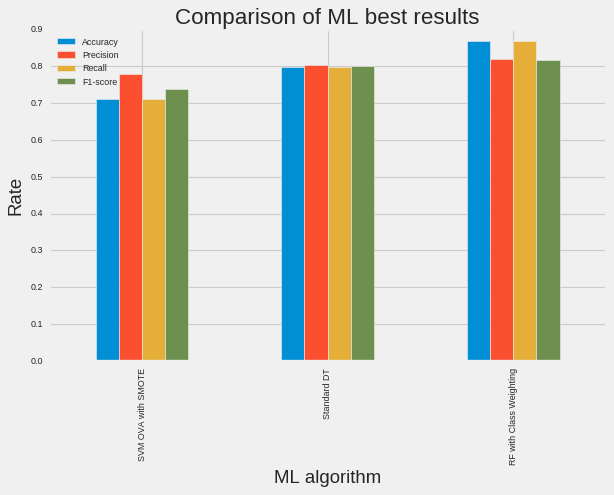

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plotdata = pd.DataFrame({
    'Accuracy': [0.711, 0.798, 0.869],
    'Precision': [0.778, 0.804, 0.819],
    'Recall': [0.711, 0.798, 0.869],
    'F1-score': [0.737, 0.801, 0.817]},
    index=['SVM OVA with SMOTE', 'Standard DT', 'RF with Class Weighting'])
plt.style.use(['seaborn-v0_8-paper','fivethirtyeight'])
plotdata.plot(kind="bar",figsize=(8, 5))
plt.title("Comparison of ML best results")
plt.xlabel("ML algorithm")
plt.ylabel("Rate")